In [1]:
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
liverT = pd.read_excel('./dot_under_0.2/NFRP_liver_target.xlsx')
liverT.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,Adult_Liver_bRP_Elite_82_f01.00135.00135.3,1,LRSDLDEKETER/3,0.185,0.000638,[2],0,0.324,68,0.0634,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q69YQ0|CYTSA_HUMAN(pre=K,post=S)",163016217
1,Adult_Liver_bRP_Elite_82_f01.00146.00146.2,1,ELISVVIAVK/2,0.178,0.010000,[2],0,-0.005,31,0.0730,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q86VP3|PACS2_HUMAN(pre=K,post=M)",54458459
2,Adult_Liver_bRP_Elite_82_f01.00337.00337.2,1,IVGGWDLLPR/2,0.190,0.011000,[2],0,0.506,52,0.0530,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96RQ9|OXLA_HUMAN(pre=R,post=A)",119810442
3,Adult_Liver_bRP_Elite_82_f01.00374.00374.2,1,RGDGSVPEYDPSSDR/2,0.180,0.010000,[2],0,-0.004,17,0.0610,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q96QZ7|MAGI1_HUMAN(pre=K,post=H)",211849982
4,Adult_Liver_bRP_Elite_82_f01.00390.00390.2,1,LPPLPVVEKPK/2,0.163,0.015000,[2],0,-0.007,8,0.1040,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9NUL3|STAU2_HUMAN(pre=K,post=L)",159237886


In [4]:
liverT1 = liverT.loc[:, ['ID']]
liverT1.head()

,ID
0,LRSDLDEKETER/3
1,ELISVVIAVK/2
2,IVGGWDLLPR/2
3,RGDGSVPEYDPSSDR/2
4,LPPLPVVEKPK/2


In [5]:
livert1 = liverT1.values.tolist()
livert1 = np.concatenate(livert1).tolist()
livert1

['LRSDLDEKETER/3',
 'ELISVVIAVK/2',
 'IVGGWDLLPR/2',
 'RGDGSVPEYDPSSDR/2',
 'LPPLPVVEKPK/2',
 'DSPSVWAAVPGK/2',
 'KVEGDMYESANSR/3',
 'VRLPALHIAAR/2',
 'AITVQEIAVLK/2',
 'TGPIKPQAIK/2',
 'TALLLAVELK/2',
 'LVLEIIHR/2',
 'FGTINIVHPK/2',
 'LVLEIIHR/2',
 'AITVQEIAVLK/2',
 'KPLIIFTPK/2',
 'KVLLEAIER/2',
 'ALAAQLPVLPR/2',
 'LVLEIIHR/2',
 'FGTINIVHPK/2',
 'TGIPLNVLPK/2',
 'QILPVLNIFK/2',
 'LVLEIIHR/2',
 'KPLIIFTPK/2',
 'FGIVLSAVITK/2',
 'TGIPLNVLPK/2',
 'IKLDQETLR/3',
 'DPSAVAK/2',
 'LHLSIVPK/2',
 'DYYDRMYSYPAR/3',
 'KDDSTWNSEVMMR/2',
 'YFSDVEETESK/2',
 'GAAGEPGK/2',
 'HLILPEK/2',
 'AKPQYKPPDDK/4',
 'ASHSTSQLSQK/2',
 'GHQQLYWSHPR/3',
 'AFEMEFDLDK/2',
 'GPAAIQK/2',
 'AGGTKPK/2',
 'LIHDLPEHHYETLK/4',
 'LDISDEFSEVIK/2',
 'NMSSAGADGR/2',
 'KPAAAGVK/2',
 'PYSLHAHGLSYEK/4',
 'RMTGSEFDFEEMK/3',
 'GFRDDPTVHDGPDR/3',
 'GPAAIQK/2',
 'TKENAEK/2',
 'AEEEDDDIK/2',
 'VRVFVVHIPR/3',
 'IHLVDKWNGLSK/3',
 'SFSHWSK/2',
 'RMTGSEFDFEEMK/3',
 'KKLGELTGTVK/3',
 'HLEHTGFSK/3',
 'SDPGTSGEAYK/2',
 'LPATEKPVLLSK/2',
 'G

In [6]:
seq_len = []
for i in livert1:
    seq_len.append(len(i) - 2)
seq_len

[12,
 10,
 10,
 15,
 11,
 12,
 13,
 11,
 11,
 10,
 10,
 8,
 10,
 8,
 11,
 9,
 9,
 11,
 8,
 10,
 10,
 10,
 8,
 9,
 11,
 10,
 9,
 7,
 8,
 12,
 13,
 11,
 8,
 7,
 11,
 11,
 11,
 10,
 7,
 7,
 14,
 12,
 10,
 8,
 13,
 13,
 14,
 7,
 7,
 9,
 10,
 12,
 7,
 13,
 11,
 9,
 11,
 12,
 10,
 16,
 14,
 7,
 7,
 11,
 13,
 7,
 13,
 15,
 13,
 14,
 9,
 12,
 11,
 9,
 14,
 16,
 10,
 9,
 10,
 8,
 7,
 7,
 7,
 10,
 7,
 8,
 7,
 10,
 15,
 12,
 10,
 10,
 9,
 11,
 7,
 15,
 11,
 9,
 10,
 11,
 10,
 11,
 11,
 7,
 10,
 7,
 23,
 23,
 12,
 11,
 11,
 14,
 17,
 14,
 8,
 10,
 13,
 7,
 9,
 16,
 13,
 13,
 7,
 8,
 18,
 7,
 7,
 16,
 15,
 13,
 8,
 7,
 16,
 13,
 9,
 14,
 13,
 12,
 9,
 14,
 9,
 9,
 14,
 11,
 14,
 11,
 13,
 7,
 9,
 13,
 8,
 26,
 7,
 12,
 14,
 13,
 12,
 18,
 11,
 11,
 11,
 15,
 14,
 18,
 12,
 20,
 7,
 13,
 12,
 19,
 10,
 9,
 14,
 10,
 12,
 7,
 12,
 10,
 15,
 13,
 13,
 12,
 7,
 7,
 23,
 8,
 16,
 24,
 13,
 12,
 9,
 11,
 12,
 12,
 8,
 10,
 9,
 15,
 8,
 7,
 18,
 14,
 27,
 16,
 10,
 10,
 21,
 8,
 9,
 17,
 14,
 15,
 7,
 11,

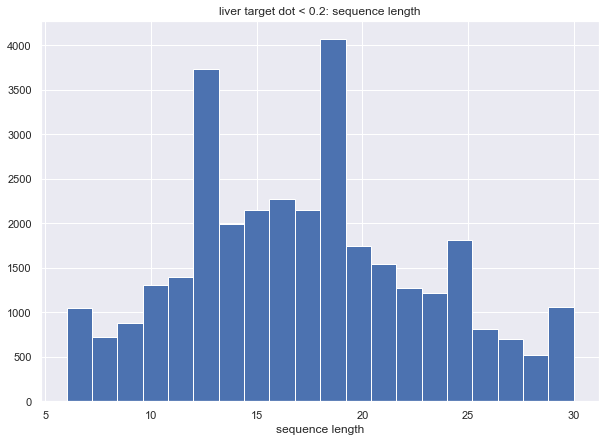

In [7]:
plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.title('liver target dot < 0.2: sequence length')
seq_length = plt.hist(seq_len, bins = 20)

1.2000000000000002


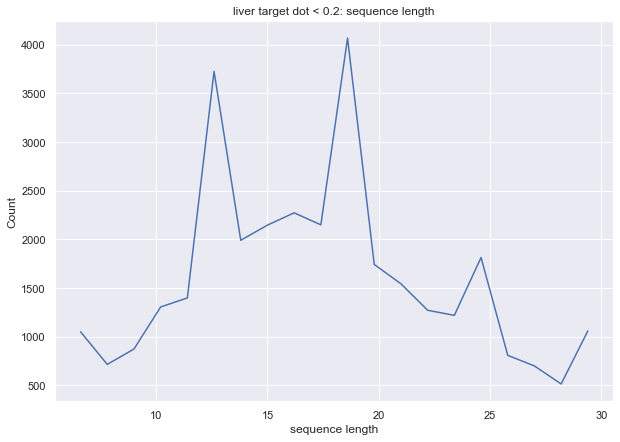

In [8]:
print(seq_length[1][1] - seq_length[1][0])

plt.figure(figsize = (10, 7))
plt.xlabel('sequence length')
plt.ylabel('Count')
plt.title('liver target dot < 0.2: sequence length')
plt.plot(seq_length[1][:-1] + 0.6, seq_length[0])
plt.show()

In [9]:
ch_state = []
for i in livert1:
    ch_state.append(int(i[-1]))
ch_state

[3,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 3,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 4,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 4,
 4,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 4,
 3,
 3,
 2,
 3,
 2,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 4,
 3,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,


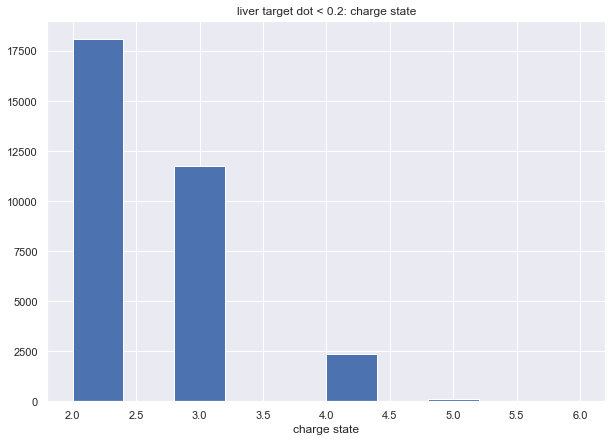

In [10]:
plt.figure(figsize = (10, 7))
plt.title('liver target dot < 0.2: charge state')
plt.xlabel('charge state')
charge_state = plt.hist(ch_state, bins = 10)

In [11]:
c_term = []
for i in livert1:
    c_term.append(i[-3])
c_term

['R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'E',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'K',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'K',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'R',
 'R',
 'K',
 'R',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'R',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K',
 'K'

In [12]:
counter1 = Counter(c_term)
counter1

Counter({'R': 13552,
         'K': 18549,
         'E': 31,
         'F': 18,
         'P': 12,
         'N': 6,
         'D': 28,
         'A': 16,
         'H': 15,
         'Y': 16,
         'Q': 23,
         'S': 27,
         'V': 18,
         'L': 31,
         'T': 8,
         'G': 2,
         'M': 9,
         'I': 15,
         'W': 3})

<function matplotlib.pyplot.show(close=None, block=None)>

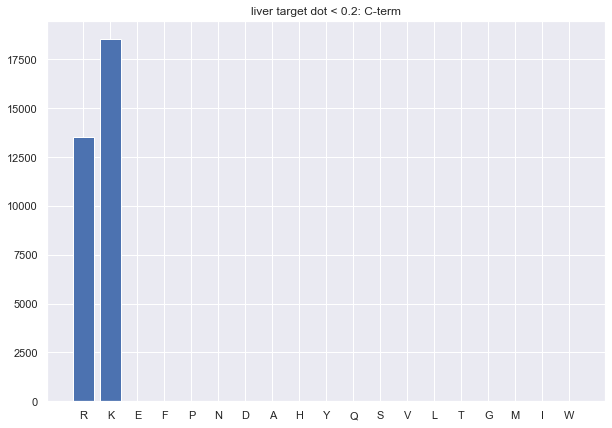

In [13]:
plt.figure(figsize = (10, 7))
plt.title('liver target dot < 0.2: C-term')
plt.bar(counter1.keys(), counter1.values())
plt.show

In [14]:
seq = []
for i in livert1:
    seq.append(i[:-2])
seq

['LRSDLDEKETER',
 'ELISVVIAVK',
 'IVGGWDLLPR',
 'RGDGSVPEYDPSSDR',
 'LPPLPVVEKPK',
 'DSPSVWAAVPGK',
 'KVEGDMYESANSR',
 'VRLPALHIAAR',
 'AITVQEIAVLK',
 'TGPIKPQAIK',
 'TALLLAVELK',
 'LVLEIIHR',
 'FGTINIVHPK',
 'LVLEIIHR',
 'AITVQEIAVLK',
 'KPLIIFTPK',
 'KVLLEAIER',
 'ALAAQLPVLPR',
 'LVLEIIHR',
 'FGTINIVHPK',
 'TGIPLNVLPK',
 'QILPVLNIFK',
 'LVLEIIHR',
 'KPLIIFTPK',
 'FGIVLSAVITK',
 'TGIPLNVLPK',
 'IKLDQETLR',
 'DPSAVAK',
 'LHLSIVPK',
 'DYYDRMYSYPAR',
 'KDDSTWNSEVMMR',
 'YFSDVEETESK',
 'GAAGEPGK',
 'HLILPEK',
 'AKPQYKPPDDK',
 'ASHSTSQLSQK',
 'GHQQLYWSHPR',
 'AFEMEFDLDK',
 'GPAAIQK',
 'AGGTKPK',
 'LIHDLPEHHYETLK',
 'LDISDEFSEVIK',
 'NMSSAGADGR',
 'KPAAAGVK',
 'PYSLHAHGLSYEK',
 'RMTGSEFDFEEMK',
 'GFRDDPTVHDGPDR',
 'GPAAIQK',
 'TKENAEK',
 'AEEEDDDIK',
 'VRVFVVHIPR',
 'IHLVDKWNGLSK',
 'SFSHWSK',
 'RMTGSEFDFEEMK',
 'KKLGELTGTVK',
 'HLEHTGFSK',
 'SDPGTSGEAYK',
 'LPATEKPVLLSK',
 'GFYPWGQYNR',
 'AHYDGFSLEPESDHYR',
 'KLEGELTEEVEMAK',
 'KPVGAAK',
 'LPVLPPK',
 'VNEFGESYEEK',
 'LAALTQGSYLHQR',
 'GVVV

In [15]:
amino_acid = []
for i in seq:
    for j in i:
        amino_acid.append(j)
amino_acid

['L',
 'R',
 'S',
 'D',
 'L',
 'D',
 'E',
 'K',
 'E',
 'T',
 'E',
 'R',
 'E',
 'L',
 'I',
 'S',
 'V',
 'V',
 'I',
 'A',
 'V',
 'K',
 'I',
 'V',
 'G',
 'G',
 'W',
 'D',
 'L',
 'L',
 'P',
 'R',
 'R',
 'G',
 'D',
 'G',
 'S',
 'V',
 'P',
 'E',
 'Y',
 'D',
 'P',
 'S',
 'S',
 'D',
 'R',
 'L',
 'P',
 'P',
 'L',
 'P',
 'V',
 'V',
 'E',
 'K',
 'P',
 'K',
 'D',
 'S',
 'P',
 'S',
 'V',
 'W',
 'A',
 'A',
 'V',
 'P',
 'G',
 'K',
 'K',
 'V',
 'E',
 'G',
 'D',
 'M',
 'Y',
 'E',
 'S',
 'A',
 'N',
 'S',
 'R',
 'V',
 'R',
 'L',
 'P',
 'A',
 'L',
 'H',
 'I',
 'A',
 'A',
 'R',
 'A',
 'I',
 'T',
 'V',
 'Q',
 'E',
 'I',
 'A',
 'V',
 'L',
 'K',
 'T',
 'G',
 'P',
 'I',
 'K',
 'P',
 'Q',
 'A',
 'I',
 'K',
 'T',
 'A',
 'L',
 'L',
 'L',
 'A',
 'V',
 'E',
 'L',
 'K',
 'L',
 'V',
 'L',
 'E',
 'I',
 'I',
 'H',
 'R',
 'F',
 'G',
 'T',
 'I',
 'N',
 'I',
 'V',
 'H',
 'P',
 'K',
 'L',
 'V',
 'L',
 'E',
 'I',
 'I',
 'H',
 'R',
 'A',
 'I',
 'T',
 'V',
 'Q',
 'E',
 'I',
 'A',
 'V',
 'L',
 'K',
 'K',
 'P',
 'L',
 'I',
 'I'

In [21]:
counter2 = Counter(amino_acid)
sorted(counter2.items())

[('A', 41732),
 ('D', 40598),
 ('E', 55697),
 ('F', 19709),
 ('G', 37709),
 ('H', 15688),
 ('I', 23160),
 ('K', 26628),
 ('L', 48966),
 ('M', 11305),
 ('N', 22365),
 ('P', 36595),
 ('Q', 29463),
 ('R', 17504),
 ('S', 44654),
 ('T', 30040),
 ('V', 33307),
 ('W', 5635),
 ('Y', 16778)]

<function matplotlib.pyplot.show(close=None, block=None)>

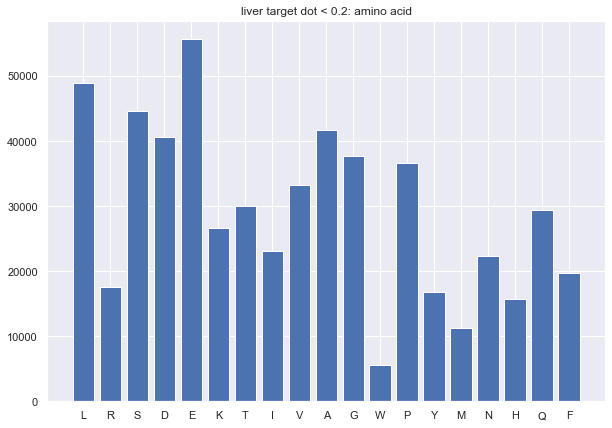

In [17]:
plt.figure(figsize = (10, 7))
plt.title('liver target dot < 0.2: amino acid')
plt.bar(counter2.keys(), counter2.values())
plt.show

In [18]:
liverT2 = liverT.loc[:, ['MzDiff']]
liverT2.head()

,MzDiff
0,0.324
1,-0.005
2,0.506
3,-0.004
4,-0.007


In [19]:
livert2 = liverT2.values.tolist()
livert2 = np.concatenate(livert2).tolist()
livert2

[0.324,
 -0.005,
 0.506,
 -0.004,
 -0.007,
 0.506,
 -0.003,
 -0.005,
 0.004,
 0.003,
 -0.005,
 0.504,
 0.506,
 0.504,
 0.004,
 0.006,
 0.008,
 -0.001,
 0.504,
 0.506,
 0.501,
 -0.004,
 0.504,
 0.006,
 0.502,
 0.501,
 0.008,
 0.503,
 0.008,
 -0.001,
 0.499,
 0.497,
 -0.007,
 0.507,
 0.246,
 0.493,
 0.326,
 0.001,
 0.004,
 0.502,
 0.249,
 0.504,
 0.491,
 -0.005,
 -0.001,
 0.326,
 -0.008,
 0.004,
 0.506,
 0.505,
 0.006,
 -0.002,
 0.009,
 0.326,
 0.008,
 0.006,
 -0.009,
 0.01,
 0.491,
 0.257,
 0.34,
 0.504,
 -0.007,
 0.006,
 0.0,
 -0.004,
 0.492,
 0.342,
 0.001,
 -0.01,
 0.507,
 0.5,
 0.004,
 -0.009,
 0.326,
 -0.001,
 0.004,
 -0.003,
 0.504,
 -0.007,
 0.496,
 -0.003,
 0.003,
 0.333,
 0.001,
 0.503,
 0.496,
 0.004,
 -0.006,
 0.504,
 0.493,
 -0.008,
 -0.01,
 -0.007,
 0.493,
 0.005,
 0.002,
 0.51,
 0.494,
 0.493,
 0.49,
 0.324,
 0.327,
 0.503,
 0.504,
 0.004,
 -0.003,
 -0.003,
 0.497,
 -0.007,
 0.335,
 0.496,
 0.341,
 -0.003,
 0.501,
 0.503,
 0.508,
 0.003,
 0.0,
 0.509,
 0.0,
 0.5,
 0.003,
 

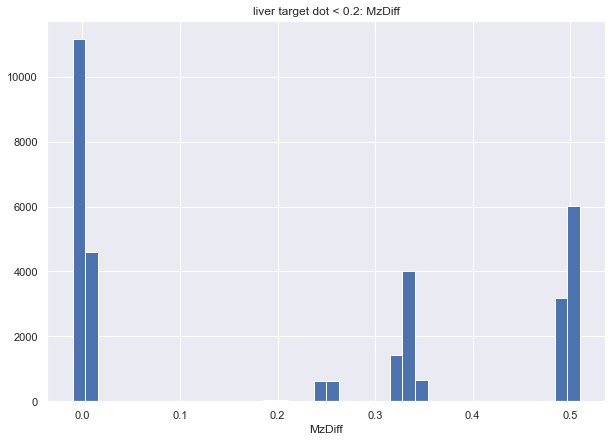

In [20]:
plt.figure(figsize = (10, 7))
plt.xlabel('MzDiff')
plt.title('liver target dot < 0.2: MzDiff')
MzDiff = plt.hist(livert2, bins = 40)